# Wine Enthusiast: What factors determine a wine's rating?

Many factors that can influence a wine's quality and taste. Commonly, those are thought to be a wine's age and price. But what factors really influence a wine's rating? To answer this question, we analyzed reviews on a variety of wines by sommeliers and professional wine tasters to determine whether features such as variety, origin, or even the taster's sentiment affects a wine's rating.

**Objective**: *What factors have the strongest influence on a wine's star rating?*



## Dataset Description

The dataset, which was obtained by Wine Enthusiast, contains 14 feature columns and 129,971 records, of which 118,840 are unique. It contains the wine reviews, ratings, and other features such as origin country, variety, and region.

In [ ]:
# Mounting Google Drive
drive.mount("/content/drive")

Mounted at /content/drive


## Feature Descriptions
* **country:** Origin country of the wine
* **description:**	Review by taster
* **designation:** Name given by producer	
* **points:** Rating given by taster
* **price:** Price of wine in USD
* **province:**	Province or state (US) of origin
* **region_1:**	Region of origin
* **region_2:**	Region of origin (duplicate)
* **taster_name:** Wine taster name
* **taster_twitter_handle:** Wine taster twitter username
* **title:** Wine name
* **variety:** Wine type
* **winery:** Winery that produced wine

## Importing Packages

In [91]:
# Importing packages
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import re
import string

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
import nltk
nltk.download('punkt')
nltk.download('stopwords')

import spacy #used spacy for text prepocessing

import gensim
from gensim import corpora

# libraries for visualization
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
%matplotlib inline

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package punkt to /Users/silviaji/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/silviaji/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [171]:
# Reading the datset
wine = pd.read_csv('/Users/silviaji/Documents/LMU MSBA/BSAN 6200/Group Project/wine.csv')

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Exploratory Data Analysis


In [93]:
# Examining first 5 rows
wine.head()

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [94]:
# Examining number of rows and columns
wine.shape

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(129971, 14)

In [95]:
# Unique number of wine titles
len(wine.title.unique())

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


118840

In [96]:
# Datatypes and column names
wine.info()

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(11)


In [97]:
# Checking for null values
wine.isna().sum()

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Unnamed: 0                   0
country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64

In [98]:
# Checking for duplicates
wine.duplicated().sum()

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0

## Data Cleaning

Preparing the data for analysis by dropping and filling null values and extracting year information from the description column. Bins are created for the continuous variables Price, Star Rating, and Year in order to get more accurate results when running models.

In [172]:
# Dropping unneeded columns
wine = wine.drop(['Unnamed: 0','designation','province','region_1','taster_name','taster_twitter_handle','region_2','winery'],axis=1)
wine.head()

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,country,description,points,price,title,variety
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,NaN,Nicosia 2013 Vulkà Bianco (Etna),White Blend
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir


In [173]:
# Finding avg price per country and variety to replace null values in price column
price_mean = wine.groupby(['country', 'variety'])['price'].transform('mean')
wine['price'].fillna(price_mean,inplace=True)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [174]:
# Checking remaining null values in price columns
wine.price.isna().sum()

# 31 price values were not populated

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


31

In [175]:
# Dropping remaining null values and zeros in price column
wine = wine[pd.notnull(wine['price'])]
wine = wine[wine.price != 0]
wine.price

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0         28.104545
1         15.000000
2         14.000000
3         13.000000
4         65.000000
            ...    
129966    28.000000
129967    75.000000
129968    30.000000
129969    32.000000
129970    21.000000
Name: price, Length: 129940, dtype: float64

In [176]:
# Creating new Column with year produced
wine_year = wine.title

wine_year =  [re.findall(r'\b20\d{2}', str(x)) for x in wine['title']]   # Extracting only the year
wine_year = pd.DataFrame(wine_year)
wine['year'] = wine_year[0]
wine['year'] = pd.to_datetime(wine['year'])
wine['year'] = pd.DatetimeIndex(wine['year']).year

# Dropping null values in year column 
wine = wine.dropna(subset=['year'],axis=0)

# Changing year to integer
wine['year'] = wine.year.astype(int)

wine.head(1)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,country,description,points,price,title,variety,year
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,28.104545,Nicosia 2013 Vulkà Bianco (Etna),White Blend,2013


### Price Bins

Wine prices range from USD4.00 to USD3,300.

Bins: 
* low = 4.0-18.0
* mid = 18.0-26.0
* high = 26.0-42.0
* ultra = 42.0-3300.0

In [177]:
# Finding price range
wine['price'].describe()

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


count    123570.000000
mean         35.752588
std          39.795509
min           4.000000
25%          18.000000
50%          26.000000
75%          43.000000
max        3300.000000
Name: price, dtype: float64

In [178]:
# Creating bins and labels for price data
bin_labels_price = ['low','mid','high','ultra']
wine['price_bin'] = pd.qcut(wine['price'],q=4, labels=bin_labels_price) #dividing data into 4 bins
wine.price_bin.value_counts()

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


low      35124
high     30982
ultra    30609
mid      26855
Name: price_bin, dtype: int64

### Star Rating Bins
Wine ratings range from 80 to 100 points.

Star ratings range from 1-5, with the point equally distributed within this range

In [179]:
# Finding ratings range
wine['points'].describe()

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


count    123570.000000
mean         88.464530
std           3.036982
min          80.000000
25%          86.000000
50%          88.000000
75%          91.000000
max         100.000000
Name: points, dtype: float64

In [180]:
# Creating bins and labels for ratings data
bin_labels_points = ['1','2','3','4','5']
wine['star_rating'] = pd.qcut(wine['points'],q=5,labels=bin_labels_points) #dividing data into 5 bins (star ratings)
wine.star_rating.value_counts()

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1    32672
2    32334
4    25637
5    21343
3    11584
Name: star_rating, dtype: int64

### Year Bins
The years range from 2000 to 2017. 

The years are binned in groups of 5 years.

In [181]:
# Finding year range
wine.year.describe()

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


count    123570.000000
mean       2010.872121
std           3.233388
min        2000.000000
25%        2009.000000
50%        2011.000000
75%        2013.000000
max        2017.000000
Name: year, dtype: float64

In [182]:
# Creating bins and labels for year data
bin_labels_year = ['2000-2005','2005-2010','2010-2015','2015 and later']
wine['year_bin'] = pd.cut(wine['year'],bins=[1999,2005,2010,2015,2018], labels=bin_labels_year)

wine.year_bin.value_counts()

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


2010-2015         69784
2005-2010         42297
2000-2005          7795
2015 and later     3694
Name: year_bin, dtype: int64

In [183]:
# Viewing result
wine.head()

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,country,description,points,price,title,variety,year,price_bin,star_rating,year_bin
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,28.104545,Nicosia 2013 Vulkà Bianco (Etna),White Blend,2013,high,2,2010-2015
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.000000,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,2011,low,2,2010-2015
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.000000,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,2013,low,2,2010-2015
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.000000,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,2013,low,2,2010-2015
4,US,"Much like the regular bottling from 2012, this...",87,65.000000,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,2012,ultra,2,2010-2015


## Sentiment Analysis

A sentiment analysis is conduced in order to identify any polarity in the wine reviews. After the polarity score is obtained, bins are created to better fit regression models. The bin groupings are as follows:

* Polarity score of -1 to 0: negative
* Polarity score of 0 to 1: positive

A column is added to the dataframe in order to keep track of the sentiment. Lastly, polarity in reviews is visualized by star rating and country.

In [186]:
# Creating functions to determine polarity

def detect_polarity(text):
    
    #Converts the text into textblob object and then retuns
    #the polarity.
    blob = TextBlob(text)
    
    # return the polarity
    return blob.sentiment.polarity

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [187]:
# Applying function to every row in data set
wine.head()
wine['polarity_score'] = wine.description.apply(detect_polarity)
wine.head()

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,country,description,points,price,title,variety,year,price_bin,star_rating,year_bin,polarity_score
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,28.104545,Nicosia 2013 Vulkà Bianco (Etna),White Blend,2013,high,2,2010-2015,0.133333
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.000000,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,2011,low,2,2010-2015,0.220000
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.000000,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,2013,low,2,2010-2015,0.025000
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.000000,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,2013,low,2,2010-2015,0.166667
4,US,"Much like the regular bottling from 2012, this...",87,65.000000,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,2012,ultra,2,2010-2015,0.306667


In [188]:
# Binning polarity and subjectivity
polarity_labels = ['negative','positive']
wine['polarity'] = pd.cut(wine['polarity_score'], bins=[-1,0,1], labels=polarity_labels)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [189]:
# Exporting for seperate model code
wine.to_csv('wine_full_data.csv')

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Visualizations
Visualizations are created to visualize the average polarity across star ratings and countries.

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


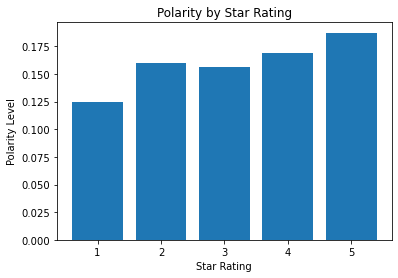

In [190]:
# Displaying Graphs of polarity by Points
points_polarity = wine.groupby('star_rating')['polarity_score'].mean()
plt.bar(points_polarity.index, points_polarity)
plt.xlabel('Star Rating')
plt.ylabel('Polarity Level')
plt.title('Polarity by Star Rating')
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


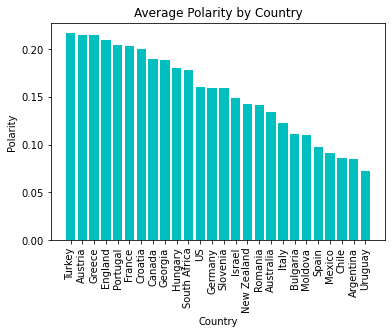

In [191]:
# Displaying Graphs of polarity by Country
wine.country.value_counts()

# Dropping all countries with less than 50 entries
country_over_50 = wine[wine.country.map(wine.country.value_counts()) > 50]

# Grouping country by average polarity
country_polarity = country_over_50.groupby('country')['polarity_score'].mean().sort_values(ascending=False)

# Creating bar chart
plt.bar(country_polarity.index, country_polarity, color = 'c')
plt.xticks(rotation = 90)
plt.title('Average Polarity by Country')
plt.xlabel('Country')
plt.ylabel('Polarity')
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


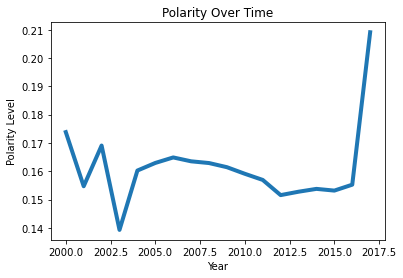

In [192]:
# Displaying Graphs of polarity by star rating
year_polarity = wine.groupby('year')['polarity_score'].mean()
plt.plot(year_polarity.index, year_polarity, linewidth=4)
plt.xlabel('Year')
plt.ylabel('Polarity Level')
plt.title('Polarity Over Time')
plt.show()

## LDA and Gensim Model
A LDA model was run in order to identify topics and top keywords. A gensim model was run to visualize the topics which are obtained from the *Description* column of the dataset. Performance evaluation helped identify the optimal number of topics.

In [213]:
# Cleaning text to remove stop words, numbers..etc
# lower case characters

def clean_text(text): 
    delete_dict = {sp_character: '' for sp_character in string.punctuation} 
    delete_dict[' '] = ' ' 
    table = str.maketrans(delete_dict)
    text1 = text.translate(table)
    
    textArr= text1.split()
    text2 = ' '.join([w for w in textArr if ( not w.isdigit() and  ( not w.isdigit() and len(w)>3))]) 
    
    return text2.lower()

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [214]:
# turning characters lower case and only keeping alphanumeric values
wine['description_gensim'] = wine.description.apply(clean_text)

# Checking for Null Values
wine.description_gensim.isna().sum()
    # 0 Null

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0

In [215]:
# Creating columns with number of words in cleaned description:
wine['Num_words_text'] = wine['description'].apply(lambda x:len(str(x).split())) 
wine.columns

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['country', 'description', 'points', 'price', 'title', 'variety', 'year',
       'price_bin', 'star_rating', 'year_bin', 'polarity_score', 'polarity',
       'description_gensim', 'Num_words_text'],
      dtype='object')

In [216]:
# Creating bins and labels for ratings data
bin_labels_points = ['1','2','3','4','5']
wine['star_rating'] = pd.qcut(wine['points'],q=5,labels=bin_labels_points) #dividing data into 5 bins (star ratings)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [217]:
# Printing number of records per review
print('-------Dataset --------')
print(wine['star_rating'].value_counts())
print(len(wine))
print('-------------------------')

# Printing number of short reviews
max_review_data_sentence_length  = wine['Num_words_text'].max()
mask = (wine['Num_words_text'] < 100) & (wine['Num_words_text'] >=20)

wine_short_reviews = wine[mask]
wine_sampled = wine_short_reviews.groupby('star_rating').apply(lambda x: x.sample(n=200)).reset_index(drop = True)

print('No of Short reviews')
print(len(wine_short_reviews))

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


-------Dataset --------
1    32672
2    32334
4    25637
5    21343
3    11584
Name: star_rating, dtype: int64
123570
-------------------------
No of Short reviews
121535


In [218]:
# Further removing stop words 
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

def remove_stopwords(text):
    textArr = text.split(' ')
    rem_text = " ".join([i for i in textArr if i not in stop_words])
    return rem_text

# Obtaining sample and removing stopwords
wine_sampled['description_gensim']=wine_sampled['description_gensim'].apply(remove_stopwords)
wine_sampled.head()

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,country,description,points,price,title,variety,year,price_bin,star_rating,year_bin,polarity_score,polarity,description_gensim,Num_words_text
0,France,"Not quite dry, this is a creamy apple-flavored...",84,12.0,Willm 2012 Gentil White (Alsace),Alsace white blend,2012,low,1,2010-2015,0.358333,positive,quite creamy appleflavored wine fresh fruity i...,23
1,US,A sense of sweetness from oak smooths out this...,85,24.0,Sobon Estate 2012 Rezerve Primitivo (Amador Co...,Primitivo,2011,mid,1,2010-2015,0.258333,positive,sense sweetness smooths medium fullbodied wine...,35
2,US,This Bordeaux blend with a little Syrah is eas...,84,24.0,Cimarone 2008 Bank Red (Santa Ynez Valley),Red Blend,2012,mid,1,2010-2015,0.122917,positive,bordeaux blend little syrah easy fruity jammy ...,23
3,France,"Soft and ripe, it has attractive peach and pea...",86,25.0,Jean-Max Roger 2012 Le Charnay (Menetou-Salon),Sauvignon Blanc,2012,mid,1,2010-2015,0.322273,positive,soft ripe attractive peach pear fruits lively ...,24
4,Chile,"Plump but wholly generic, with semisweet aroma...",84,13.0,Aresti 2007 Estate Selection Sauvignon Blanc (...,Sauvignon Blanc,2010,low,1,2005-2010,0.296905,positive,plump wholly generic semisweet aromas neither ...,52


In [219]:
# Defining lemmatization function
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

def lemmatization(texts,allowed_postags=['NOUN', 'ADJ']): 
       output = []
       for sent in texts:
             doc = nlp(sent) 
             output.append([token.lemma_ for token in doc if token.pos_ in allowed_postags ])
       return output

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [220]:
# Converting text samples to list
text_list=wine_sampled['description_gensim'].tolist()
print(text_list[1])

sense sweetness smooths medium fullbodied wine complements moderate tannins smooth texture pleasant plummy thread winds aromas flavors lingering finish


/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [221]:
# Tokenizing reviews 
tokenized_reviews = lemmatization(text_list)
print(tokenized_reviews[1])

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['sense', 'sweetness', 'smooth', 'wine', 'complement', 'moderate', 'tannin', 'texture', 'pleasant', 'plummy', 'thread', 'aroma', 'flavor', 'finish']


In [222]:
# Storing tokenized reviews in dictionary
dictionary = corpora.Dictionary(tokenized_reviews)

# Creating dtm
doc_term_matrix = [dictionary.doc2bow(rev) for rev in tokenized_reviews]

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [223]:
# Fitting LDA model
LDA = gensim.models.ldamodel.LdaModel

lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=10, random_state=100,
                chunksize=1000, passes=50,iterations=100)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [224]:
# Print the 10 topics
lda_model.print_topics()

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.029*"palate" + 0.026*"cherry" + 0.022*"aroma" + 0.019*"berry" + 0.019*"tannin" + 0.017*"spice" + 0.016*"note" + 0.016*"wine" + 0.015*"nose" + 0.013*"flavor"'),
 (1,
  '0.022*"palate" + 0.016*"wine" + 0.016*"flavor" + 0.015*"white" + 0.012*"peach" + 0.011*"apple" + 0.010*"nose" + 0.008*"flower" + 0.008*"crisp" + 0.008*"good"'),
 (2,
  '0.029*"wine" + 0.026*"flavor" + 0.023*"black" + 0.020*"fruit" + 0.020*"cherry" + 0.019*"tannin" + 0.014*"ripe" + 0.013*"spice" + 0.012*"cabernet" + 0.012*"palate"'),
 (3,
  '0.027*"finish" + 0.023*"aroma" + 0.022*"flavor" + 0.021*"fruit" + 0.016*"wine" + 0.012*"tannin" + 0.012*"palate" + 0.012*"cherry" + 0.009*"berry" + 0.009*"note"'),
 (4,
  '0.042*"wine" + 0.035*"acidity" + 0.035*"flavor" + 0.034*"fruit" + 0.019*"ripe" + 0.018*"drink" + 0.014*"rich" + 0.013*"crisp" + 0.013*"fruity" + 0.012*"texture"'),
 (5,
  '0.036*"flavor" + 0.026*"wine" + 0.022*"cherry" + 0.016*"cabernet" + 0.016*"tannin" + 0.011*"finish" + 0.011*"year" + 0.010*"aroma" + 0.

In [225]:
# Visualize the topics
#https://github.com/bmabey/pyLDAvis
#https://speakerdeck.com/bmabey/visualizing-topic-models
pyLDAvis.enable_notebook()

vis = gensimvis.prepare(lda_model, doc_term_matrix, dictionary)
vis

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.134085 -0.093328       1        1  20.186829
2     -0.066716 -0.052154       2        1  15.905347
8      0.091000 -0.046015       3        1  12.882748
0     -0.075257 -0.037862       4        1  12.176467
9     -0.131506  0.034802       5        1   8.180954
6      0.060738 -0.012623       6        1   7.652745
3     -0.035299  0.021479       7        1   7.483289
5     -0.079613 -0.025712       8        1   6.946076
7      0.010043  0.062242       9        1   5.555344
1      0.092523  0.149171      10        1   3.030202, topic_info=         Term        Freq       Total Category  logprob  loglift
24     cherry  229.000000  229.000000  Default  30.0000  30.0000
91   cabernet   86.000000   86.000000  Default  29.0000  29.0000
50     palate  254.000000  254.000000  Default  28.0000  28.0000
105     white   76.000000   76.000000  Default  27.0000  27.0000
131     apple   91.000000   91.000000  Default  26.0000  26.0000
..        ...         ...         ...      ...      ...      ...
18     tannin    2.731979  217.183965  Topic10  -5.3299  -0.8792
145     grape    2.382022   50.043882  Topic10  -5.4670   0.4516
8       aroma    2.481587  207.722035  Topic10  -5.4260  -0.9308
128      note    2.453287  164.002908  Topic10  -5.4375  -0.7059
233  vineyard    2.371343   53.551927  Topic10  -5.4715   0.3793

[780 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
2397      6  0.591083       19th
2414      4  0.574060      aaron
2068      5  0.780178    ability
2667      9  0.605544   absolute
32        1  0.533222    acidity
...     ...       ...        ...
99       10  0.028642       year
266       3  0.296405  zinfandel
266       6  0.148202  zinfandel
266       7  0.296405  zinfandel
266       9  0.148202  zinfandel

[1703 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 3, 9, 1, 10, 7, 4, 6, 8, 2])

In [226]:
#How will we know that this LDA model is good: Perplexity versus coherence.
#Lower the perplexity, the model is better.
print('\nPerplexity: ', lda_model.log_perplexity(doc_term_matrix,total_docs=10000))  # a measure of how good the model is. lower the better.
#Higher the coherence, the model is better.
#Compute Coherence Score
from gensim.models.coherencemodel import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=tokenized_reviews, dictionary=dictionary , coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Perplexity:  -6.445525138972588

Coherence Score:  0.3157086784078775


In [227]:
#Compute the coherence scores by varying the number of topics

def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [228]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=doc_term_matrix, texts=tokenized_reviews, start=2, limit=50, step=1)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


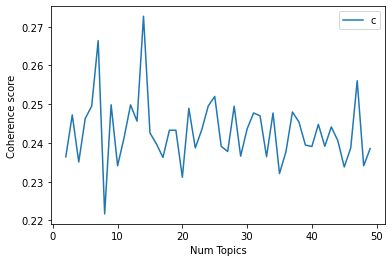

In [229]:
# Show graph
limit=50; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()# Print the coherence scores

In [230]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.2364
Num Topics = 3  has Coherence Value of 0.2472
Num Topics = 4  has Coherence Value of 0.2351
Num Topics = 5  has Coherence Value of 0.2463
Num Topics = 6  has Coherence Value of 0.2495
Num Topics = 7  has Coherence Value of 0.2664
Num Topics = 8  has Coherence Value of 0.2217
Num Topics = 9  has Coherence Value of 0.2499
Num Topics = 10  has Coherence Value of 0.2341
Num Topics = 11  has Coherence Value of 0.2413
Num Topics = 12  has Coherence Value of 0.2498
Num Topics = 13  has Coherence Value of 0.2456
Num Topics = 14  has Coherence Value of 0.2727
Num Topics = 15  has Coherence Value of 0.2426
Num Topics = 16  has Coherence Value of 0.2397
Num Topics = 17  has Coherence Value of 0.2363
Num Topics = 18  has Coherence Value of 0.2433
Num Topics = 19  has Coherence Value of 0.2433
Num Topics = 20  has Coherence Value of 0.2311
Num Topics = 21  has Coherence Value of 0.249
Num Topics = 22  has Coherence Value of 0.2387
Num Topics = 23  has C

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [231]:
# Select the model and print the topics
optimal_model = model_list[3]
model_topics = optimal_model.show_topics(formatted=False)
optimal_model.print_topics(num_words=10)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.027*"wine" + 0.018*"tannin" + 0.017*"fruit" + 0.017*"palate" + 0.014*"acidity" + 0.014*"note" + 0.012*"ripe" + 0.011*"flavor" + 0.011*"finish" + 0.011*"aroma"'),
 (1,
  '0.040*"wine" + 0.030*"flavor" + 0.019*"tannin" + 0.019*"fruit" + 0.018*"drink" + 0.014*"acidity" + 0.013*"cherry" + 0.012*"ripe" + 0.010*"black" + 0.009*"palate"'),
 (2,
  '0.028*"wine" + 0.027*"flavor" + 0.022*"cherry" + 0.019*"palate" + 0.016*"fruit" + 0.015*"acidity" + 0.013*"aroma" + 0.012*"ripe" + 0.010*"tannin" + 0.010*"black"'),
 (3,
  '0.029*"flavor" + 0.020*"finish" + 0.016*"wine" + 0.015*"aroma" + 0.013*"fruit" + 0.013*"palate" + 0.010*"note" + 0.010*"apple" + 0.009*"hint" + 0.009*"green"'),
 (4,
  '0.035*"fruit" + 0.028*"wine" + 0.024*"flavor" + 0.013*"acidity" + 0.011*"palate" + 0.011*"rich" + 0.009*"aroma" + 0.009*"spice" + 0.009*"ripe" + 0.009*"vanilla"')]

In [133]:
# Visualize the topics
#After reducing the number of topics, there is not much overlapping
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(optimal_model, doc_term_matrix, dictionary)
vis

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.049143  0.010552       1        1  34.554973
2     -0.044988  0.029280       2        1  18.197364
1      0.006508  0.034929       3        1  18.103551
0     -0.035757 -0.040221       4        1  14.892420
3      0.025095 -0.034540       5        1  14.251692, topic_info=        Term        Freq       Total Category  logprob  loglift
29      wine  577.000000  577.000000  Default  30.0000  30.0000
104     good   97.000000   97.000000  Default  29.0000  29.0000
6     flavor  465.000000  465.000000  Default  28.0000  28.0000
0    acidity  245.000000  245.000000  Default  27.0000  27.0000
14     white   94.000000   94.000000  Default  26.0000  26.0000
..       ...         ...         ...      ...      ...      ...
104     good   14.596732   97.025433   Topic5  -5.2164   0.0541
153     full   12.344908   76.243862   Topic5  -5.3840   0.1276
140     ripe   16.315803  187.258835   Topic5  -5.1051  -0.4921
203     dark   13.115629  103.516099   Topic5  -5.3234  -0.1176
7      fresh   11.357002  109.288595   Topic5  -5.4674  -0.3159

[437 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
2252      5  0.603847        2011
1256      5  0.400441   abundance
0         1  0.268314     acidity
0         2  0.239857     acidity
0         3  0.203268     acidity
...     ...       ...         ...
2485      3  0.584161  youthfully
249       4  0.821050     zealand
1971      4  0.407886   zestiness
1971      5  0.407886   zestiness
2255      5  0.603868         zin

[818 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 3, 2, 1, 4])

In [234]:
# Removing gensim columns
wine = wine.drop(['description_gensim','Num_words_text'],axis=1)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Topic Modeling: NFM 

The Gensim Model found the optimal number of topics to be five. Hence, five topics will be chosen when identifying topics and keywords using the NFM approach. After the topics are identified, they are named according to the key words. Lastly, word clouds are generated to visualize the various topics and the most important key words. The various word clouds visualize keywords in both the entire dataset as well as the top five countries.

In [236]:
#TfidfVectorizer performs a count vectorizer beforehand.
tf = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [237]:
# Creating document term matrix of wine.description
dtm = tf.fit_transform(wine['description']) # Call fit_transform on the description column
dtm

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<123570x19883 sparse matrix of type '<class 'numpy.float64'>'
	with 2899960 stored elements in Compressed Sparse Row format>

In [238]:
# Creating NMF
nmf_model = NMF(n_components=5,random_state=42)
nmf_model

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


NMF(n_components=5, random_state=42)

In [239]:
# Fitting model
nmf_model.fit(dtm)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


NMF(n_components=5, random_state=42)

In [240]:
# Obtaining number of features
len(tf.get_feature_names())

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


19883

In [241]:
# Obtaining topic names and words
for index,topic in enumerate(nmf_model.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index+1}')
    print([tf.get_feature_names()[i] for i in topic.argsort()[-5:]])                                           
    print('\n')

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


THE TOP 15 WORDS FOR TOPIC #1
['blend', 'cabernet', 'oak', 'finish', 'flavors']


THE TOP 15 WORDS FOR TOPIC #2
['tannins', 'fruits', 'rich', 'ripe', 'wine']


THE TOP 15 WORDS FOR TOPIC #3
['lemon', 'peach', 'citrus', 'white', 'apple']


THE TOP 15 WORDS FOR TOPIC #4
['aromas', 'tannins', 'palate', 'cherry', 'black']


THE TOP 15 WORDS FOR TOPIC #5
['light', 'crisp', 'acidity', 'wine', 'fruity']




In [242]:
# Naming topic classes
wine_classification = {0: 'Red & Oaky Wine', 1: 'Fruity Wines', 2:'Rich & Ripe Wines', 3: 'Bouquet Wines', 4: 'Dry Wines'}

# Attaching topics to original dtm
topic_labels = nmf_model.transform(dtm)

# Grab the index position of the most representative topic by calling argmax().
topic_labels[0].argmax()

# Placing Topic classification of each wine into an array
topic_labels.argmax(axis=1)

# Creating new column for topic class
wine['topic_class'] = topic_labels.argmax(axis=1)

# Adding topic classificaltion label
wine['topic_class'] = wine['topic_class'].map(wine_classification)
wine.topic_class.value_counts()

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Rich & Ripe Wines    32265
Red & Oaky Wine      32011
Fruity Wines         24141
Bouquet Wines        20677
Dry Wines            14476
Name: topic_class, dtype: int64

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


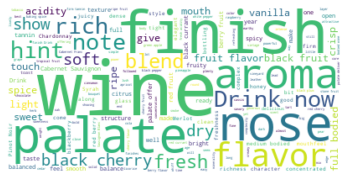

In [243]:
 # WorldCloud for entire dataset

# concatenate all the reviews into one single string 
full_text = ' '.join(wine['description'])

my_stop_words = ["https", "co", "RT", 'aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'rt', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] + list(STOPWORDS)
cloud_no_stopword = WordCloud(background_color='white', stopwords=my_stop_words).generate(full_text)

    # SYNTAX: WordCloud(background_color='white', stopwords= x ).generate(your list of words)

plt.imshow(cloud_no_stopword, interpolation='bilinear')
plt.axis('off')
plt.show()

In [244]:
# NFM by Country
# Identifying countries with the most wine records
wine.country.value_counts().nlargest(5)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


US          51800
France      21056
Italy       18560
Spain        6322
Portugal     5414
Name: country, dtype: int64

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


US


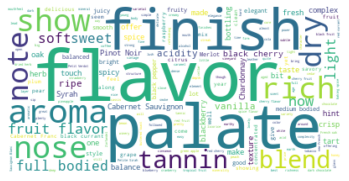

France


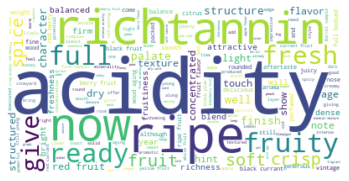

Italy


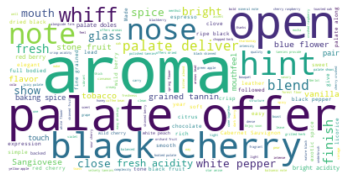

Spain


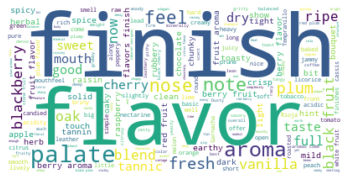

Portugal


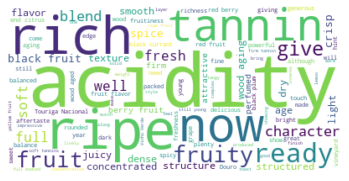

In [245]:
# Word Cloud by Country:
# concatenate all the reviews into one single string
countries = ['US', 'France', 'Italy', 'Spain', 'Portugal']

def country_wordcloud(countries):
  for x in countries:
    print(x)
    df = wine[wine.country == x]
    full_text = ' '.join(df['description'])

    my_stop_words = ["drink","wine","https", "co", "RT", 'aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'rt', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] + list(STOPWORDS)
    cloud_no_stopword = WordCloud(background_color='white', stopwords=my_stop_words).generate(full_text)

        # SYNTAX: WordCloud(background_color='white', stopwords= x ).generate(your list of words)

    plt.imshow(cloud_no_stopword, interpolation='bilinear')
    plt.axis('off')
    plt.show()
country_wordcloud(countries)

## Logistic Regression
A multinomial logistic regression performed in order to identify the top features that influence a wine's star rating. 

### Preparing Data

The data is prepared to fit the regression. First, countries are replaced by continents (regions) in order to avoid too many features which can lead to overfitting. Then, One Hot Encoding is used to create dummy variables for the variables in order to run the regression. During this process, any remainng null values are removed.

In [246]:
# Replacing country with region (continent)
wine.country.replace(
    ['Italy', 'Portugal','Spain', 'France', 'Germany', 'Austria', 'Hungary', 'Greece', 
     'Romania', 'Czech Republic', 'Slovenia', 'Luxembourg', 'Croatia', 'England', 'Bulgaria', 
     'Switzerland', 'Bosnia and Herzegovina', 'Ukraine', 'Slovakia', 'Serbia', 'Moldova', 
     'Morocco', 'Cyprus', 'Macedonia'], 'Europe', inplace=True)
wine.country.replace(['US', 'Canada'], 'North America', inplace=True)
wine.country.replace(['Argentina', 'Chile', 'Mexico', 'Uruguay', 'Brazil', 'Peru'], 'South America',inplace=True)
wine.country.replace(['South Africa', 'Egypt'], 'Africa',inplace=True)
wine.country.replace(['Israel', 'Lebanon', 'India', 'Armenia', 'China', 'Turkey', 'Georgia'], 'Asia',inplace=True)
wine.country.replace(['New Zealand', 'Australia'], 'Australia',inplace=True)

# Renaming column to region
wine.rename(columns={'country':'region'}, inplace=True)

# Dropping nulls
wine = wine.dropna(subset=['region'], axis=0)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [247]:
# Dropping uneeded columns
wine_original = wine
wine = wine.drop(['title','description','points','year','price','points', 'variety','polarity_score'], axis=1)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [248]:
# Checking for nulls
wine.isna().sum()

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


region         0
price_bin      0
star_rating    0
year_bin       0
polarity       0
topic_class    0
dtype: int64

In [249]:
# Previewing result
wine.head(1)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,region,price_bin,star_rating,year_bin,polarity,topic_class
0,Europe,high,2,2010-2015,positive,Rich & Ripe Wines


In [250]:
# Selecting data to be encoded
encode = wine.drop('star_rating', axis=1)

#Encoding - one hot encoder
enc = OneHotEncoder()
wine_enc = enc.fit_transform(encode)
col_names = enc.get_feature_names(encode.columns)

#Creating dataframe from encoded values
wine_enc = pd.DataFrame(wine_enc.todense(), columns= col_names) #todense() reshapes array 
wine_enc.head()

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:104: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_int = np.zeros((n_samples, n_features), dtype=np.int)
/opt/anac

,region_Africa,region_Asia,region_Australia,region_Europe,region_North America,region_South America,price_bin_high,price_bin_low,price_bin_mid,price_bin_ultra,...,year_bin_2005-2010,year_bin_2010-2015,year_bin_2015 and later,polarity_negative,polarity_positive,topic_class_Bouquet Wines,topic_class_Dry Wines,topic_class_Fruity Wines,topic_class_Red & Oaky Wine,topic_class_Rich & Ripe Wines
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


### Logistic Regression Model
The logistic regression model is fitted in order to predict star ratings for wines that are not included in the dataset. More importantly, it identifies the features that have the strongest influence on a wine's star rating by calling their coefficients' absolute values.

In [251]:
#Identify feature and label columns
feature_cols = wine_enc

X = feature_cols
y = wine.star_rating

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [252]:
#Splitting the Dataset into 65% train and 35% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=35, random_state=35)

#Dropping index
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [253]:
#Scaling data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [254]:
#Fitting model
logreg = LogisticRegression(multi_class='multinomial', solver='newton-cg').fit(X_train, y_train)

#Making predictions
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Accuracy of logistic regression classifier on test set: 0.51


In [255]:
#Classification report to measure performance
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           1     0.4000    0.6667    0.5000         6
           2     0.4000    0.4444    0.4211         9
           3     0.0000    0.0000    0.0000         3
           4     0.8333    0.4167    0.5556        12
           5     0.5556    1.0000    0.7143         5

    accuracy                         0.5143        35
   macro avg     0.4378    0.5056    0.4382        35
weighted avg     0.5365    0.5143    0.4865        35



/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [256]:
#Calling coefficients
logreg.coef_

#Storing coefficients in dictionary with feature names
coef_dict = {}

for coef, feat in zip(logreg.coef_[0,:], feature_cols):
  coef_dict[feat] = coef

#storing result in DataFrame including signs to show positive or negative influence
coef = pd.DataFrame.from_dict(coef_dict,orient='index', columns=['coefficient'])

#Viewing results
coef.sort_values(by='coefficient', ascending=False)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,coefficient
price_bin_low,0.644342
topic_class_Dry Wines,0.278877
polarity_negative,0.161496
topic_class_Red & Oaky Wine,0.150841
price_bin_mid,0.069908
region_North America,0.061438
region_South America,0.053815
year_bin_2005-2010,0.033130
year_bin_2000-2005,0.011719
year_bin_2015 and later,0.005500


In [257]:
# Obtaining coefficient's absolute value identify features' influence
abs(coef).sort_values(by='coefficient', ascending=False)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,coefficient
price_bin_low,0.644342
price_bin_ultra,0.527047
topic_class_Dry Wines,0.278877
price_bin_high,0.212110
topic_class_Fruity Wines,0.198997
polarity_positive,0.161496
polarity_negative,0.161496
topic_class_Red & Oaky Wine,0.150841
topic_class_Bouquet Wines,0.123670
region_Australia,0.074447


## kNN based Recommender System

Build a Recommender System that suggest five preferred wines based on a custom input.

In [258]:
#Importing module
from sklearn.neighbors import NearestNeighbors

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [259]:
#Adding random wine data
rand_wine_data = {
    'region_Africa':0, 'region_Asia':0, 'region_Australia':0, 'region_Europe':1,
       'region_North America':0, 'region_South America':0, 'price_bin_high':1,
       'price_bin_low':0, 'price_bin_mid':0, 'price_bin_ultra':0,
       'year_bin_2000-2005':0, 'year_bin_2005-2010':0, 'year_bin_2010-2015':1,
       'year_bin_2015 and later':0, 'topic_class_Bouquet Wines':0, 'topic_class_Dry Wines':1,
       'topic_class_Fruity Wines':0, 'topic_class_Red & Oaky Wine':0,
       'topic_class_Rich & Ripe Wines':0, 'polarity_negative':0, 'polarity_positive':1, 
       'star_rating':4
}

rand_wine = pd.DataFrame(data=rand_wine_data, index=[0])
rand_wine

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,region_Africa,region_Asia,region_Australia,region_Europe,region_North America,region_South America,price_bin_high,price_bin_low,price_bin_mid,price_bin_ultra,...,year_bin_2010-2015,year_bin_2015 and later,topic_class_Bouquet Wines,topic_class_Dry Wines,topic_class_Fruity Wines,topic_class_Red & Oaky Wine,topic_class_Rich & Ripe Wines,polarity_negative,polarity_positive,star_rating
0,0,0,0,1,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,1,4


In [260]:
# Joining label and feature columns
wine_enc = wine_enc.join(y, how='inner')
wine_enc.head(1)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,region_Africa,region_Asia,region_Australia,region_Europe,region_North America,region_South America,price_bin_high,price_bin_low,price_bin_mid,price_bin_ultra,...,year_bin_2010-2015,year_bin_2015 and later,polarity_negative,polarity_positive,topic_class_Bouquet Wines,topic_class_Dry Wines,topic_class_Fruity Wines,topic_class_Red & Oaky Wine,topic_class_Rich & Ripe Wines,star_rating
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2


In [261]:
# Re-adding title column
wine_enc['title'] = wine_original['title']

# Dropping nulls
wine_enc.dropna(subset=['title'], axis=0, inplace=True)

# Selecting feature variables 
feature_cols = wine_enc.drop(['title'],axis=1)
X_kNN = feature_cols
y_kNN = wine_enc['title']

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [262]:
# Using NearestNeighbors model and kneighbors() method to find k neighbors.
# Setting n_neighbors = 5 to find 5 similar wines 
neigh = NearestNeighbors(n_neighbors=5, algorithm='auto')
neigh.fit(X_kNN)

distances, indices = neigh.kneighbors(rand_wine)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [263]:
# Printing the top 5 wine recommendations:
print('Recommendations based on the selected wine:\n')
for i in range(len(distances.flatten())):
  print('{0}. {1}'.format(i+1, wine_enc['title'].iloc[indices.flatten()[i]],distances.flatten()[i]))

Recommendations based on the selected wine:

1. Trefethen 2014 Cabernet Sauvignon (Oak Knoll District)
2. WillaKenzie Estate 2011 Estate Grown Pinot Blanc (Willamette Valley)
3. Lemelson 2012 Dry Riesling (Willamette Valley)
4. Petaluma 2010 Chardonnay (Piccadilly Valley)
5. Rasa 2012 Doctrina Perpetua Syrah (Columbia Valley (WA))


/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
